# NASA Turbofan Jet Engine Data Set
link = https://www.kaggle.com/datasets/behrad3d/nasa-cmaps

### prepare column names as given:
1) unit number
2) time, in cycles
3) operational setting 1
4) operational setting 2
5) operational setting 3
6) sensor measurement 1
7) sensor measurement 2
…
26) sensor measurement 26

In [ ]:
# function to prepare the train and test datasets each of FDOO1, FD002, FD003 and
import pandas as pd

def prepare_dataset(subset_id):

  """
  returns completely prepared train and test datasets by
  defining column names and calulating target value 'RUL'
  for each unit.
  """
  # defining column names (total 26)
  index_names = ['unit', 'time_cycles']
  setting_names = ['setting_1','setting_2', 'setting_3']
  sensor_names = ['s_{}'.format(i) for i in range(1, 22)]

  # total columns (26)
  col_names = index_names + setting_names + sensor_names
  # load train dataset
  train = pd.read_csv(f'/content/train_{subset_id}.txt', header=None, sep='\s+', names=col_names)

  # find max cycles for each unit
  # RUL = Max(cycles) - current(cycles)
  max_cycles = train.groupby('unit')['time_cycles'].max().reset_index()
  max_cycles.columns = ['unit', 'max_cycles']
  # merge max_cycles with train dataset
  train = train.merge(max_cycles, on='unit', how='left')
  # calculate RUL
  train['RUL'] = train['max_cycles'] - train['time_cycles']
  # drop the max_cylces col
  train.drop('max_cycles', axis=1)

  # load test dataset and RUL file
  test = pd.read_csv(f'test_{subset_id}.txt', sep='\s+', header=None, names=col_names)
  rul_truth = pd.read_csv(f'RUL_{subset_id}.txt', sep='\s+', header=None, names=['remaining_life'])

  rul_truth['unit'] = rul_truth.index + 1

  #  RUL in Test = (Cycles from Truth File) + (Max cycles in Test file - Current cycle)
  max_test_cycles = test.groupby('unit')['time_cycles'].max().reset_index()
  max_test_cycles.columns = ['unit', 'max_cycles_recorded']
  # merge for test data and max_test_cycles
  test = test.merge(max_test_cycles, on='unit', how='left')
  # merge test data and rul_turth on same 'unit'
  test = test.merge(rul_truth, on='unit', how='left')

  # Total RUL in test dataset
  test['RUL'] = test['remaining_life'] + (test['max_cycles_recorded'] - test['time_cycles'])
  test.drop(['max_cycles_recorded', 'remaining_life'], axis=1)

  return train, test


<>:19: SyntaxWarning: invalid escape sequence '\s'
<>:33: SyntaxWarning: invalid escape sequence '\s'
<>:34: SyntaxWarning: invalid escape sequence '\s'
<>:19: SyntaxWarning: invalid escape sequence '\s'
<>:33: SyntaxWarning: invalid escape sequence '\s'
<>:34: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1241480752.py:19: SyntaxWarning: invalid escape sequence '\s'
  train = pd.read_csv(f'/content/train_{subset_id}.txt', header=None, sep='\s+', names=col_names)
/tmp/ipython-input-1241480752.py:33: SyntaxWarning: invalid escape sequence '\s'
  test = pd.read_csv(f'test_{subset_id}.txt', sep='\s+', header=None, names=col_names)
/tmp/ipython-input-1241480752.py:34: SyntaxWarning: invalid escape sequence '\s'
  rul_truth = pd.read_csv(f'RUL_{subset_id}.txt', sep='\s+', header=None, names=['remaining_life'])


In [ ]:
train_1,test_1 = prepare_dataset('FD001')

In [ ]:
train_1.head(3)

,unit,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,max_cycles,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192,189


In [ ]:
test_1.head(3)

,unit,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_15,s_16,s_17,s_18,s_19,s_20,s_21,max_cycles_recorded,remaining_life,RUL
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8.4052,0.03,392,2388,100.0,38.86,23.3735,31,112,142
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8.3803,0.03,393,2388,100.0,39.02,23.3916,31,112,141
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8.4441,0.03,393,2388,100.0,39.08,23.4166,31,112,140


In [ ]:
# load FD002
train_2,test_2 = prepare_dataset('FD002')

In [ ]:
train_2.head(3)

,unit,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,max_cycles,RUL
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071,149,148
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665,149,147
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723,149,146


In [ ]:
test_2.head(3)

,unit,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_15,s_16,s_17,s_18,s_19,s_20,s_21,max_cycles_recorded,remaining_life,RUL
0,1,1,9.9987,0.2502,100.0,489.05,605.03,1497.17,1304.99,10.52,...,8.6476,0.03,369,2319,100.0,28.42,17.1551,258,18,275
1,1,2,20.0026,0.7000,100.0,491.19,607.82,1481.20,1246.11,9.35,...,9.2405,0.02,364,2324,100.0,24.29,14.8039,258,18,274
2,1,3,35.0045,0.8400,100.0,449.44,556.00,1359.08,1128.36,5.48,...,9.3472,0.02,333,2223,100.0,14.98,8.9125,258,18,273


In [ ]:
train_3, test_3 = prepare_dataset('FD003')

In [ ]:
train_3.head(2)

,unit,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,max_cycles,RUL
0,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,...,8145.32,8.4246,0.03,391,2388,100.0,39.11,23.3537,259,258
1,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,...,8152.85,8.4403,0.03,392,2388,100.0,38.99,23.4491,259,257


In [ ]:
test_3.head(2)

,unit,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_15,s_16,s_17,s_18,s_19,s_20,s_21,max_cycles_recorded,remaining_life,RUL
0,1,1,-0.0017,-0.0004,100.0,518.67,641.94,1581.93,1396.93,14.62,...,8.3760,0.03,391,2388,100.0,39.07,23.4468,233,44,276
1,1,2,0.0006,-0.0002,100.0,518.67,642.02,1584.86,1398.90,14.62,...,8.4062,0.03,391,2388,100.0,39.04,23.4807,233,44,275


In [ ]:
train_4, test_4 = prepare_dataset('FD004')

In [ ]:
train_4.head(2)

,unit,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,max_cycles,RUL
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,...,8074.83,9.3335,0.02,330.0,2212.0,100.0,10.62,6.3670,321,320
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,...,8046.13,9.1913,0.02,361.0,2324.0,100.0,24.37,14.6552,321,319


In [ ]:
test_4.head(3)

,unit,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_15,s_16,s_17,s_18,s_19,s_20,s_21,max_cycles_recorded,remaining_life,RUL
0,1,1,20.0072,0.700,100.0,491.19,606.67,1481.04,1227.81,9.35,...,9.2229,0.02,362.0,2324.0,100.00,24.31,14.7007,230,22,251
1,1,2,24.9984,0.620,60.0,462.54,536.22,1256.17,1031.48,7.05,...,10.8632,0.02,306.0,1915.0,84.93,14.36,8.5748,230,22,250
2,1,3,42.0000,0.842,100.0,445.00,549.23,1340.13,1105.88,3.91,...,9.3960,0.02,328.0,2212.0,100.00,10.39,6.4365,230,22,249


In [ ]:
# function to merge all datastets into one
def merge_datasets():
  subset_ids = ['FD001','FD002','FD003','FD004']
  train_lst = []
  test_lst = []
  # to generate unique 'unit' for each datasets
  offset = 0
  for ids in subset_ids:

    train, test = prepare_dataset(ids)
    # add ids (FD001, FD002..) to trace dataset
    train['subset'] = ids
    test['subset'] = ids

    # add offset to unit
    train['unit'] = train['unit'] + offset
    test['unit'] = test['unit'] + offset

    # increase offset for each ids E.g. = 100 (FD001)-> 101(FD002)
    offset += train['unit'].max()

    # create a list of datasets (E.g. = [FD001, FD002, FD003, FD004])
    train_lst.append(train)
    test_lst.append(test)

    # concate the all datasets
    train_df = pd.concat(train_lst, axis=0, ignore_index=True)
    test_df = pd.concat(test_lst, axis=0, ignore_index=True)

  return train_df, test_df

In [ ]:
# load the combined dataset
train, test = merge_datasets()

In [ ]:
# print train_df
train.head(3)

,unit,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_15,s_16,s_17,s_18,s_19,s_20,s_21,max_cycles,RUL,subset
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8.4195,0.03,392,2388,100.0,39.06,23.4190,192,191,FD001
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8.4318,0.03,392,2388,100.0,39.00,23.4236,192,190,FD001
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8.4178,0.03,390,2388,100.0,38.95,23.3442,192,189,FD001


In [ ]:
# print test_df
test.head(3)

,unit,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_16,s_17,s_18,s_19,s_20,s_21,max_cycles_recorded,remaining_life,RUL,subset
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,0.03,392,2388,100.0,38.86,23.3735,31,112,142,FD001
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,0.03,393,2388,100.0,39.02,23.3916,31,112,141,FD001
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,0.03,393,2388,100.0,39.08,23.4166,31,112,140,FD001


In [ ]:
train.shape

(160359, 29)

In [ ]:
train['subset'].value_counts().reset_index()

,subset,count
0,FD004,61249
1,FD002,53759
2,FD003,24720
3,FD001,20631


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160359 entries, 0 to 160358
Data columns (total 29 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   unit         160359 non-null  int64  
 1   time_cycles  160359 non-null  int64  
 2   setting_1    160359 non-null  float64
 3   setting_2    160359 non-null  float64
 4   setting_3    160359 non-null  float64
 5   s_1          160359 non-null  float64
 6   s_2          160359 non-null  float64
 7   s_3          160359 non-null  float64
 8   s_4          160359 non-null  float64
 9   s_5          160359 non-null  float64
 10  s_6          160359 non-null  float64
 11  s_7          160359 non-null  float64
 12  s_8          160359 non-null  float64
 13  s_9          160359 non-null  float64
 14  s_10         160359 non-null  float64
 15  s_11         160359 non-null  float64
 16  s_12         160359 non-null  float64
 17  s_13         160359 non-null  float64
 18  s_14         160359 non-

In [ ]:
train.describe()

,unit,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,max_cycles,RUL
count,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,...,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000
mean,599.577043,123.331338,17.211973,0.410004,95.724344,485.840890,597.361022,1467.035653,1260.956434,9.894999,...,8088.950972,9.054747,0.025185,360.698801,2273.754039,98.389146,25.942709,15.565700,245.662676,122.331338
std,450.409236,83.538146,16.527988,0.367938,12.359044,30.420388,42.478516,118.175261,136.300073,4.265554,...,80.623257,0.751581,0.004997,31.021430,142.513114,4.656270,11.691422,7.015067,76.475379,83.538146
min,1.000000,1.000000,-0.008700,-0.000600,60.000000,445.000000,535.480000,1242.670000,1023.770000,3.910000,...,7845.780000,8.156300,0.020000,302.000000,1915.000000,84.930000,10.160000,6.010500,128.000000,0.000000
25%,196.000000,57.000000,0.001300,0.000200,100.000000,449.440000,549.960000,1357.360000,1126.830000,5.480000,...,8070.530000,8.439250,0.020000,332.000000,2212.000000,100.000000,14.330000,8.601300,191.000000,56.000000
50%,481.000000,114.000000,19.998100,0.620000,100.000000,489.050000,605.930000,1492.810000,1271.740000,9.350000,...,8118.590000,9.030100,0.030000,367.000000,2319.000000,100.000000,24.920000,14.953500,226.000000,113.000000
75%,1107.000000,173.000000,35.001500,0.840000,100.000000,518.670000,642.340000,1586.590000,1402.200000,14.620000,...,8139.410000,9.344200,0.030000,392.000000,2388.000000,100.000000,38.820000,23.294600,285.000000,172.000000
max,1269.000000,543.000000,42.008000,0.842000,100.000000,518.670000,645.110000,1616.910000,1441.490000,14.620000,...,8293.720000,11.066900,0.030000,400.000000,2388.000000,100.000000,39.890000,23.950500,543.000000,542.000000


In [ ]:
# null values
print("null values = ", train.isnull().sum().sum())
print("total null values = ", train.isnull().sum().sum())

null values =  0
total null values =  0


In [ ]:
# null values in test datasets
print('null values = ', test.isnull().sum())
print("total null values = ", test.isnull().sum().sum())

null values =  unit                   0
time_cycles            0
setting_1              0
setting_2              0
setting_3              0
s_1                    0
s_2                    0
s_3                    0
s_4                    0
s_5                    0
s_6                    0
s_7                    0
s_8                    0
s_9                    0
s_10                   0
s_11                   0
s_12                   0
s_13                   0
s_14                   0
s_15                   0
s_16                   0
s_17                   0
s_18                   0
s_19                   0
s_20                   0
s_21                   0
max_cycles_recorded    0
remaining_life         0
RUL                    0
subset                 0
dtype: int64
total null values =  0


In [ ]:
print('columns in train dataset: ')
print(train.columns)
print("\n columns in test dataset: ")
print(test.columns)

columns in train dataset: 
Index(['unit', 'time_cycles', 'setting_1', 'setting_2', 'setting_3', 's_1',
       's_2', 's_3', 's_4', 's_5', 's_6', 's_7', 's_8', 's_9', 's_10', 's_11',
       's_12', 's_13', 's_14', 's_15', 's_16', 's_17', 's_18', 's_19', 's_20',
       's_21', 'max_cycles', 'RUL', 'subset'],
      dtype='object')

 columns in test dataset: 
Index(['unit', 'time_cycles', 'setting_1', 'setting_2', 'setting_3', 's_1',
       's_2', 's_3', 's_4', 's_5', 's_6', 's_7', 's_8', 's_9', 's_10', 's_11',
       's_12', 's_13', 's_14', 's_15', 's_16', 's_17', 's_18', 's_19', 's_20',
       's_21', 'max_cycles_recorded', 'remaining_life', 'RUL', 'subset'],
      dtype='object')


In [ ]:
# drop subset from train
train = train.drop('subset', axis=1)
# drop subset and reamining_life from test data
test = test.drop(['subset','remaining_life'], axis=1)

In [ ]:
# rename max_cycles_recorded into max_cycles
test = test.rename(columns={'max_cycles_recorded':'max_cycles'})

In [ ]:
print(test.columns)

Index(['unit', 'time_cycles', 'setting_1', 'setting_2', 'setting_3', 's_1',
       's_2', 's_3', 's_4', 's_5', 's_6', 's_7', 's_8', 's_9', 's_10', 's_11',
       's_12', 's_13', 's_14', 's_15', 's_16', 's_17', 's_18', 's_19', 's_20',
       's_21', 'max_cycles', 'RUL'],
      dtype='object')


In [ ]:
train.to_csv('training_data.csv', index=False)
test.to_csv('test_data.csv', index=False)
print("files saved")

files saved


## EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

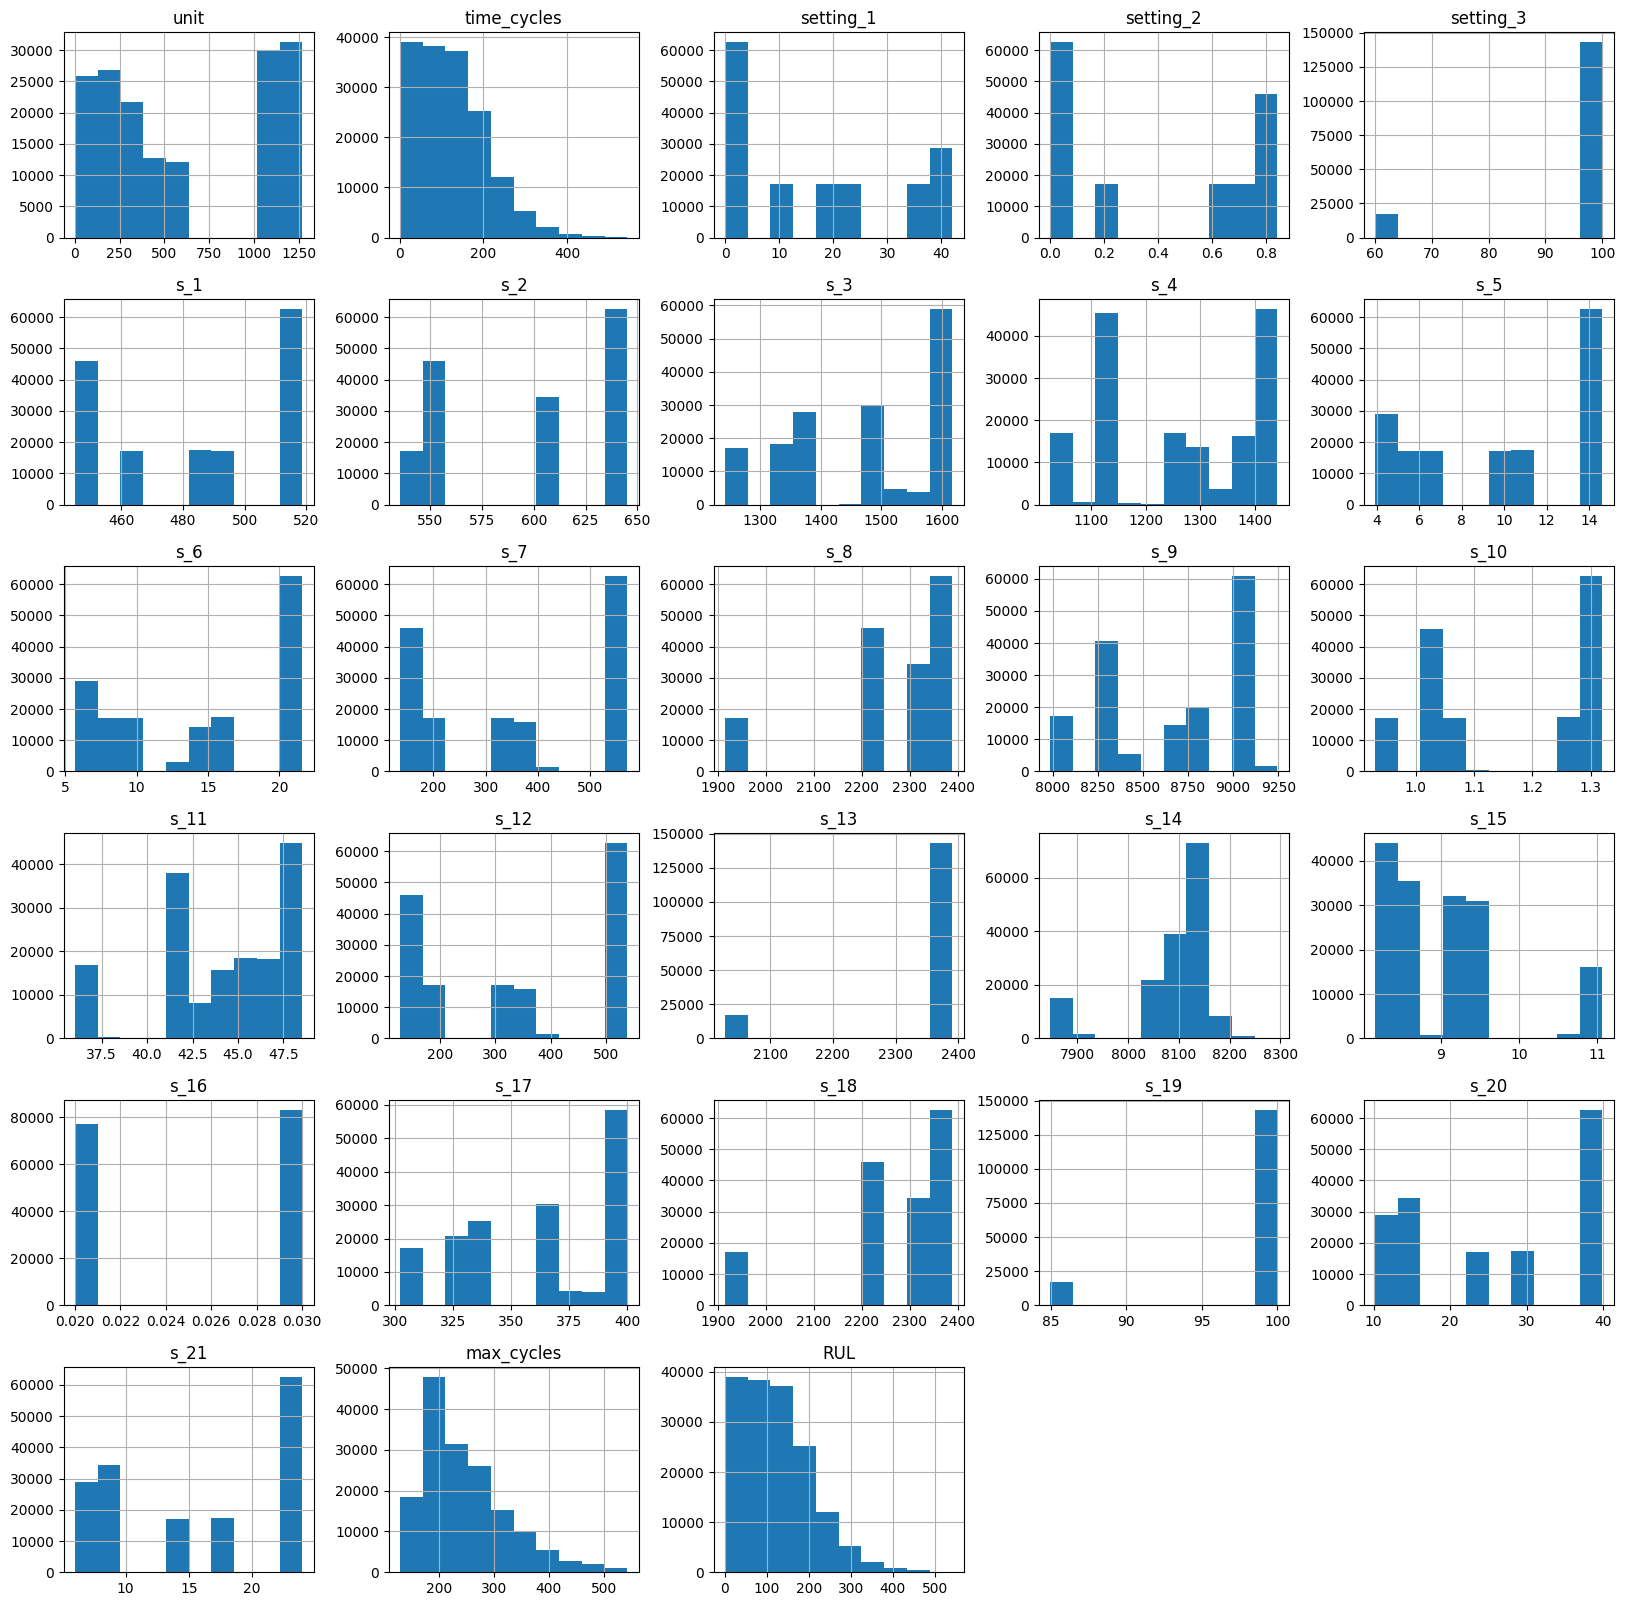

In [ ]:
# plot the histogram for each numerical data
train.hist(figsize=(20,20))
plt.show()

In [ ]:
print(train.corr())

                 unit  time_cycles  setting_1  setting_2  setting_3       s_1  \
unit         1.000000     0.128668   0.272403   0.290603  -0.090414 -0.282577   
time_cycles  0.128668     1.000000  -0.009588  -0.009960   0.000687  0.009526   
setting_1    0.272403    -0.009588   1.000000   0.967487  -0.163079 -0.979797   
setting_2    0.290603    -0.009960   0.967487   1.000000  -0.197923 -0.939207   
setting_3   -0.090414     0.000687  -0.163079  -0.197923   1.000000  0.264989   
s_1         -0.282577     0.009526  -0.979797  -0.939207   0.264989  1.000000   
s_2         -0.280664     0.012651  -0.925472  -0.898218   0.493244  0.969407   
s_3         -0.277857     0.029766  -0.877521  -0.867189   0.601374  0.926589   
s_4         -0.290619     0.036380  -0.909480  -0.912110   0.539436  0.943456   
s_5         -0.289726     0.010034  -0.991539  -0.965691   0.230742  0.992550   
s_6         -0.292038     0.009417  -0.985378  -0.963720   0.290031  0.992447   
s_7         -0.289949     0.

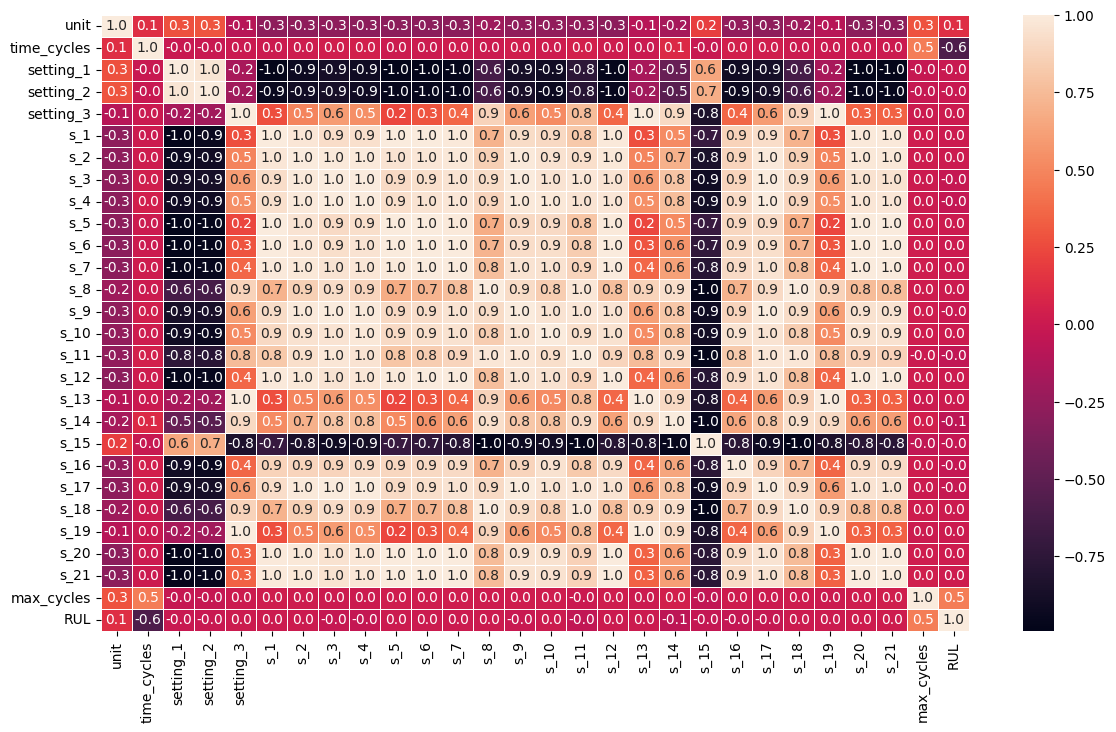

In [ ]:
# plot heatmap
plt.figure(figsize=(14,8))
sns.heatmap(train.corr(), annot=True, fmt='.1f', linewidth=.5)
plt.show()

<Axes: xlabel='s_15', ylabel='RUL'>

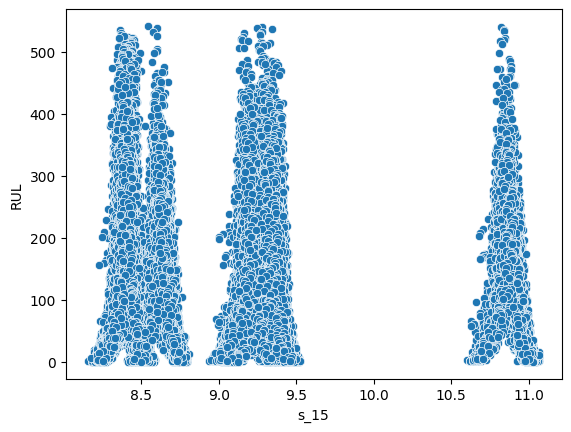

In [ ]:
sns.scatterplot(x='s_15', y='RUL', data=train)

In [ ]:
"""
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# 2. Plot data on the individual axes
ax1.plot(x, y_sin, 'b-')
ax1.set_title('Sine Wave')
ax1.set_xlabel('x')
ax1.set_ylabel('sin(x)')
ax1.grid(True)

ax2.plot(x, y_cos, 'r-')
ax2.set_title('Cosine Wave')
ax2.set_xlabel('x')
ax2.set_ylabel('cos(x)')
ax2.grid(True)

# 3. Adjust layout to prevent overlapping
plt.tight_layout()

# 4. Display the figure
plt.show()
"""

"\nfig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))\n\n# 2. Plot data on the individual axes\nax1.plot(x, y_sin, 'b-')\nax1.set_title('Sine Wave')\nax1.set_xlabel('x')\nax1.set_ylabel('sin(x)')\nax1.grid(True)\n\nax2.plot(x, y_cos, 'r-')\nax2.set_title('Cosine Wave')\nax2.set_xlabel('x')\nax2.set_ylabel('cos(x)')\nax2.grid(True)\n\n# 3. Adjust layout to prevent overlapping\nplt.tight_layout()\n\n# 4. Display the figure\nplt.show()\n"

# Day - 2


In [2]:
# load cleaned dataset
import pandas as pd
train = pd.read_csv('/content/training_data.csv')
test = pd.read_csv('/content/test_data.csv')
print("dataset loaded succesfully!")

dataset loaded succesfully!


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160359 entries, 0 to 160358
Data columns (total 28 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   unit         160359 non-null  int64  
 1   time_cycles  160359 non-null  int64  
 2   setting_1    160359 non-null  float64
 3   setting_2    160359 non-null  float64
 4   setting_3    160359 non-null  float64
 5   s_1          160359 non-null  float64
 6   s_2          160359 non-null  float64
 7   s_3          160359 non-null  float64
 8   s_4          160359 non-null  float64
 9   s_5          160359 non-null  float64
 10  s_6          160359 non-null  float64
 11  s_7          160359 non-null  float64
 12  s_8          160359 non-null  float64
 13  s_9          160359 non-null  float64
 14  s_10         160359 non-null  float64
 15  s_11         160359 non-null  float64
 16  s_12         160359 non-null  float64
 17  s_13         160359 non-null  float64
 18  s_14         160359 non-

In [ ]:
train.std()

,0
unit,143.302800
time_cycles,63.277916
setting_1,16.450355
setting_2,0.369823
setting_3,11.535666
s_1,30.434317
s_2,42.337766
s_3,116.853244
s_4,134.995707
s_5,4.282251


<Axes: ylabel='Frequency'>

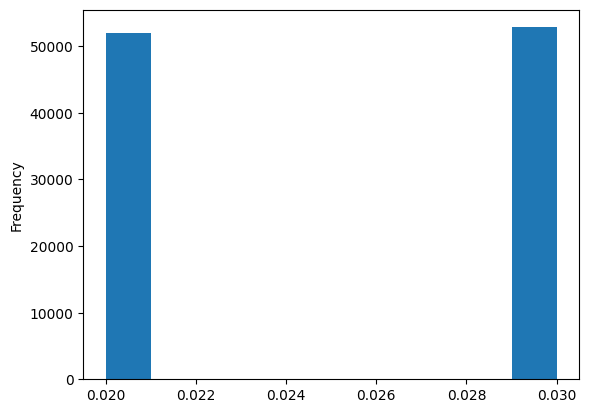

In [ ]:
train['s_16'].plot(kind='hist')

In [ ]:
train['s_16'].unique()

array([0.03, 0.02])

In [4]:
train = train.drop('max_cycles', axis=1)
test = test.drop('max_cycles', axis=1)

In [5]:
train.isnull().sum()

,0
unit,0
time_cycles,0
setting_1,0
setting_2,0
setting_3,0
s_1,0
s_2,0
s_3,0
s_4,0
s_5,0


In [ ]:
# get null columns
null_cols = []
for col in train.columns:
  if train[col].isnull().sum() >= 1:
    null_cols.append(col)

print(null_cols)

['s_1', 's_2', 's_3', 's_4', 's_5', 's_6', 's_7', 's_8', 's_9', 's_10', 's_11', 's_12', 's_13', 's_14', 's_15', 's_16', 's_17', 's_18', 's_19', 's_20', 's_21', 'RUL']


In [ ]:
# fill the values in null_cols with median values
for col in null_cols:
  train[col].fillna(train[col].median(), inplace=True)

/tmp/ipython-input-1119703336.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(train[col].median(), inplace=True)


In [ ]:
# after imputation
train[null_cols].isnull().sum()

,0
s_1,0
s_2,0
s_3,0
s_4,0
s_5,0
s_6,0
s_7,0
s_8,0
s_9,0
s_10,0


In [6]:
train.columns

Index(['unit', 'time_cycles', 'setting_1', 'setting_2', 'setting_3', 's_1',
       's_2', 's_3', 's_4', 's_5', 's_6', 's_7', 's_8', 's_9', 's_10', 's_11',
       's_12', 's_13', 's_14', 's_15', 's_16', 's_17', 's_18', 's_19', 's_20',
       's_21', 'RUL'],
      dtype='object')

In [7]:
test.columns

Index(['unit', 'time_cycles', 'setting_1', 'setting_2', 'setting_3', 's_1',
       's_2', 's_3', 's_4', 's_5', 's_6', 's_7', 's_8', 's_9', 's_10', 's_11',
       's_12', 's_13', 's_14', 's_15', 's_16', 's_17', 's_18', 's_19', 's_20',
       's_21', 'RUL'],
      dtype='object')

In [8]:
# create the list of columns to preprocess
train_cols_preprocess = []
test_cols_preprocess = []

for cols in train.columns:
  if cols not in ['RUL','unit']:
    train_cols_preprocess.append(cols)

for cols in test.columns:
  if cols not in ['RUL','unit']:
    test_cols_preprocess.append(cols)

print("train cols: \n", train_cols_preprocess)
print("test cols: \n", test_cols_preprocess)

train cols: 
 ['time_cycles', 'setting_1', 'setting_2', 'setting_3', 's_1', 's_2', 's_3', 's_4', 's_5', 's_6', 's_7', 's_8', 's_9', 's_10', 's_11', 's_12', 's_13', 's_14', 's_15', 's_16', 's_17', 's_18', 's_19', 's_20', 's_21']
test cols: 
 ['time_cycles', 'setting_1', 'setting_2', 'setting_3', 's_1', 's_2', 's_3', 's_4', 's_5', 's_6', 's_7', 's_8', 's_9', 's_10', 's_11', 's_12', 's_13', 's_14', 's_15', 's_16', 's_17', 's_18', 's_19', 's_20', 's_21']


In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train[train_cols_preprocess])
test_scaled = scaler.transform(test[test_cols_preprocess])

print("scaling complete")

scaling complete


In [10]:
# save the scaler
import joblib
scaler = joblib.dump(scaler, 'scaler.pkl')
print("scaler saved")

scaler saved


Create dataframe of scaled columns

In [11]:
train_scaled_df = pd.DataFrame(train_scaled, columns=train_cols_preprocess)
test_scaled_df = pd.DataFrame(test_scaled, columns=test_cols_preprocess)
print("dataframe created for train and test")

dataframe created for train and test


In [12]:
# confirm
train_scaled_df.head(3)

,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,s_6,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,0.000000,0.000190,0.000237,1.0,1.0,0.969990,0.927293,0.902111,1.0,1.0,...,0.961313,0.993194,0.653748,0.090428,1.0,0.918367,1.0,1.0,0.972082,0.970373
1,0.001845,0.000252,0.000356,1.0,1.0,0.973000,0.932957,0.908192,1.0,1.0,...,0.962828,0.993332,0.637831,0.094654,1.0,0.918367,1.0,1.0,0.970064,0.970630
2,0.003690,0.000105,0.001068,1.0,1.0,0.974824,0.922723,0.910730,1.0,1.0,...,0.963170,0.993222,0.641715,0.089844,1.0,0.897959,1.0,1.0,0.968382,0.966204


merge `RUL` and  `unit` from unscaled dataset with scaled

In [13]:
cols_to_merge = ['unit', 'RUL']

train_dataset = pd.concat([train[cols_to_merge], train_scaled_df], axis=1)
test_dataset = pd.concat([test[cols_to_merge], test_scaled_df], axis=1)
print("dataset merged")

dataset merged


In [ ]:
# save scaled test dataset
test_dataset.to_csv('test_scaled.csv', index=False)

In [14]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160359 entries, 0 to 160358
Data columns (total 27 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   unit         160359 non-null  int64  
 1   RUL          160359 non-null  int64  
 2   time_cycles  160359 non-null  float64
 3   setting_1    160359 non-null  float64
 4   setting_2    160359 non-null  float64
 5   setting_3    160359 non-null  float64
 6   s_1          160359 non-null  float64
 7   s_2          160359 non-null  float64
 8   s_3          160359 non-null  float64
 9   s_4          160359 non-null  float64
 10  s_5          160359 non-null  float64
 11  s_6          160359 non-null  float64
 12  s_7          160359 non-null  float64
 13  s_8          160359 non-null  float64
 14  s_9          160359 non-null  float64
 15  s_10         160359 non-null  float64
 16  s_11         160359 non-null  float64
 17  s_12         160359 non-null  float64
 18  s_13         160359 non-

Converting dataset into 3D numpy array or tensor for LSTM input

In [15]:
import numpy as np
def generate_squence(df, window_size, feature_cols):
  # final squential dataset
  X, y = [], []
  for unit_id in df['unit'].unique():
    # all data for single engine (single unit)
    engine_data = df[df['unit'] == unit_id]

    # convert lists into numpy
    features = engine_data[feature_cols].values
    target = engine_data['RUL'].values

    for i in range(window_size, len(engine_data)):
      X.append(features[i-window_size:i, :])
      y.append(target[i])

  return np.array(X), np.array(y)

In [16]:
FEATURE_COLS = []
for col in train.columns:
  if col in ['unit','RUL']:
    continue
  FEATURE_COLS.append(col)

print(FEATURE_COLS)

['time_cycles', 'setting_1', 'setting_2', 'setting_3', 's_1', 's_2', 's_3', 's_4', 's_5', 's_6', 's_7', 's_8', 's_9', 's_10', 's_11', 's_12', 's_13', 's_14', 's_15', 's_16', 's_17', 's_18', 's_19', 's_20', 's_21']


In [17]:
winow_size = 50
feature_cols = FEATURE_COLS
X_train, y_train = generate_squence(df=train_dataset, window_size=winow_size, feature_cols=feature_cols)

In [18]:
print("final input shape: ", X_train.shape)

final input shape:  (124909, 50, 25)


In [19]:
y_train.shape

(124909,)

In [21]:
X_train.shape

(124909, 50, 25)

## Build LSTM Architecture

In [22]:
from tensorflow import keras
from tensorflow.keras import layers, models
import tensorflow as tf

In [23]:
window_size = 50
feature_input = X_train.shape[2]

# build layers
model = models.Sequential([
    # first LSTM layer
    layers.LSTM(units=100, return_sequences=True, input_shape=(window_size, feature_input)),
    layers.Dropout(0.3),
    # sencond LSTM layer
    layers.LSTM(units=50, return_sequences=False),
    layers.Dropout(0.3),

    # Dense Layer
    layers.Dense(units=20, activation='relu'),
    layers.BatchNormalization(),
    # output layer
    layers.Dense(units=1)
    ])

# compile model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(
    patience=5,
    restore_best_weights=True,
    monitor='val_loss'
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=0.00001
)

In [25]:
# fit the model
history = model.fit(
    X_train, y_train,
    batch_size=64,
    validation_split=0.1,
    epochs=50,
    verbose=1,
    callbacks=[early_stop, reduce_lr]
)

Epoch 1/50
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - loss: 11545.4658 - mean_absolute_error: 86.5191 - val_loss: 1988.5708 - val_mean_absolute_error: 32.9252 - learning_rate: 0.0010
Epoch 2/50
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - loss: 2158.0847 - mean_absolute_error: 31.9823 - val_loss: 1738.3544 - val_mean_absolute_error: 28.5804 - learning_rate: 0.0010
Epoch 3/50
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - loss: 1820.5330 - mean_absolute_error: 29.3692 - val_loss: 1741.7426 - val_mean_absolute_error: 29.4150 - learning_rate: 0.0010
Epoch 4/50
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - loss: 1759.6686 - mean_absolute_error: 28.7737 - val_loss: 1839.7977 - val_mean_absolute_error: 29.5730 - learning_rate: 0.0010
Epoch 5/50
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - loss: 1688.8455 - mean_absolute_error: 28.0604 - val_loss: 1838.7201 - val_mean_absolute_error: 29.1646 - learning_rate: 0.0010
Epoch 6/50
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - loss: 1565.

<Axes: title={'center': 'Mean Absolute Error'}>

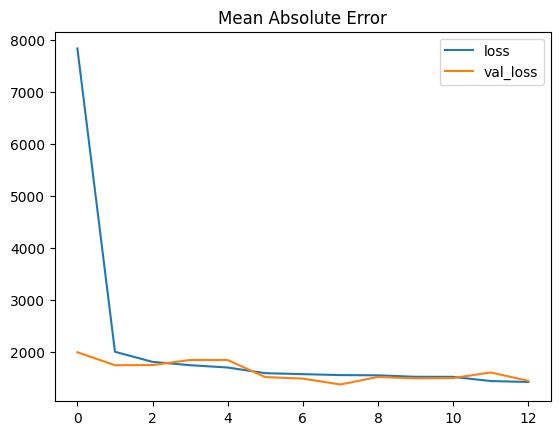

In [26]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Mean Absolute Error")

In [27]:
test_dataset.columns

Index(['unit', 'RUL', 'time_cycles', 'setting_1', 'setting_2', 'setting_3',
       's_1', 's_2', 's_3', 's_4', 's_5', 's_6', 's_7', 's_8', 's_9', 's_10',
       's_11', 's_12', 's_13', 's_14', 's_15', 's_16', 's_17', 's_18', 's_19',
       's_20', 's_21'],
      dtype='object')

In [28]:
# spli test dataset into x and y
X_test, y_test = generate_squence(df=test_dataset, window_size=winow_size, feature_cols=feature_cols)

In [32]:
# shape
X_test.shape

(11385, 50, 25)

In [33]:
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

# Check for NaN values in y_test
nan_indices = np.isnan(y_test)
if np.any(nan_indices):
    print(f"Warning: y_test contains {np.sum(nan_indices)} NaN values. These will be removed for evaluation.")
    # Filter out NaN values from y_test and corresponding predictions from y_pred
    y_test_filtered = y_test[~nan_indices]
    y_pred_filtered = y_pred[~nan_indices]
else:
    y_test_filtered = y_test
    y_pred_filtered = y_pred

# Flatten y_pred_filtered as model.predict outputs a 2D array (n_samples, 1)
y_pred_filtered = y_pred_filtered.flatten()

mae = mean_absolute_error(y_test_filtered, y_pred_filtered)
r2 = r2_score(y_test_filtered, y_pred_filtered)
print("r2 score: ", r2)
print("mae : ", mae)

356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
r2 score:  0.4416420942275846
mae :  28.595172809239266


In [34]:
model.save('lstm_model.h5')